# Estimating Turnover in Retail Trade

### Capstone Project by Christian Furger 

## Machine Learning - Results

In this notebook, the results of the different models (Ridge, kNN, RandomForest and kMeans) are compared with each other. 

In [1]:
# Import statements
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Import Results <a name="1"></a>

In [2]:
# Import datasets with the predictions
df2020_pred = pd.read_csv('df2020_pred.csv', index_col = ('OID', 'Date'), dtype = {'Stratum_Noga' : object, 'Noga_Enterprise' : object, 'Hist_Limit' : object})
df2019_pred = pd.read_csv('df2019_pred.csv', index_col = ('OID', 'Date'), dtype = {'Stratum_Noga' : object, 'Noga_Enterprise' : object, 'Hist_Limit' : object})

print('df2020_pred:', df2020_pred.shape)
print('df2019_pred:', df2019_pred.shape)

df2020_pred: (43180, 28)
df2019_pred: (37858, 28)


In [3]:
# Import model results 2020
baseline2020=pd.read_csv('baseline2020.csv')
ridge2020=pd.read_csv('ridge2020.csv')
kNN2020=pd.read_csv('kNN2020.csv')
rf2020=pd.read_csv('rf2020.csv')
cl2020=pd.read_csv('cl2020.csv')

results2020=pd.concat([baseline2020,ridge2020,kNN2020,rf2020,cl2020],ignore_index=True)

In [4]:
# Import model results 2019
baseline2019=pd.read_csv('baseline2019.csv')
ridge2019=pd.read_csv('ridge2019.csv')
kNN2019=pd.read_csv('kNN2019.csv')
rf2019=pd.read_csv('rf2019.csv')
cl2019=pd.read_csv('cl2019.csv')

results2019=pd.concat([baseline2019,ridge2019,kNN2019,rf2019,cl2019],ignore_index=True)

## 2. Model Comparison<a name="2"></a>

In [5]:
# Function to plot predicted vs real values
def plot_predictions(df,year):

    colors = ['Red', 'Green', 'Blue', 'Brown']
    models = ['ridge', 'kNN', 'rf', 'cl']

    fig, axes = plt.subplots(1, len(models), figsize=(5*len(models),5), sharey=True, sharex=True)
    fig.suptitle('Dataset ending '+str(year)+': Scatter plots of real vs predicted turnover (log)', fontsize=20, y=1.01)
       
    for m in range(0, len(models)):

        strate_df=df                

        #axes[m].scatter(np.log1p(strate_df['TOV']), np.log1p(strate_df['TOV_'+models[m]]), label='', color=colors[m], s=1)
        axes[m].scatter(np.log1p(strate_df['TOV']), np.log1p(strate_df['TOV_'+models[m]]), label='', c=strate_df['err_'+models[m]+'_log'], cmap='coolwarm', s=1)        
        axes[m].plot([0,14],[0,14], color='black', linewidth=1)

        #obtain a (slope) and b(intercept) of linear regression line
        a, b = np.polyfit(np.log1p(strate_df['TOV']), np.log1p(strate_df['TOV_'+models[m]]), 1)

        # Generate a hundred values between 0 and 14
        x_values = np.linspace(0, 14, num=100)
        # Compute the associate y values
        y_values = a*x_values + b

        #add linear regression line to scatterplot          
        axes[m].plot(x_values, y_values, color=colors[m], label='slope: {:.2f}'.format(a))

        axes[m].set_title(models[m]+' - Total')
        axes[m].set_xlabel('real')
        axes[m].set_ylabel('predicted')
        axes[m].legend()

    plt.show()

In [6]:
# Function to plot predicted vs real values by stratum
def plot_predictions2(df,year,stratum):

    colors = ['Red', 'Green', 'Blue', 'Brown']
    models = ['ridge', 'kNN', 'rf', 'cl']

    if stratum == 'Noga':
        Stratum = ['4711.472','4719','473','474','475','476','477','478.479']
    if stratum == 'Size':
        Stratum = ['small','medium','large']
        
    fig, axes = plt.subplots(len(Stratum), len(models), figsize=(5*len(models),5*len(Stratum)), sharey=True, sharex=True)
    fig.suptitle('Dataset ending '+str(year)+': Scatter plots of real vs predicted turnover (log), by '+stratum, fontsize=20, y=0.92)
    
    for i in range(0,len(Stratum)):    
        for m in range(0, len(models)):
               
            if stratum=='Noga':
                strate_df=df[df['Stratum_'+stratum]==Stratum[i]]
            if stratum=='Size':
                strate_df=df[df['Stratum_'+stratum]==i+1]                   

            #axes[i,m].scatter(np.log1p(strate_df['TOV']), np.log1p(strate_df['TOV_'+models[m]]), label='', color=colors[m], s=1)
            axes[i,m].scatter(np.log1p(strate_df['TOV']), np.log1p(strate_df['TOV_'+models[m]]), label='', c=strate_df['err_'+models[m]+'_log'], cmap='coolwarm', s=1)  
            axes[i,m].plot([0,14],[0,14], color='black', linewidth=1)

            #obtain a (slope) and b(intercept) of linear regression line
            a, b = np.polyfit(np.log1p(strate_df['TOV']), np.log1p(strate_df['TOV_'+models[m]]), 1)

            # Generate a hundred values between 0 and 14
            x_values = np.linspace(0, 14, num=100)
            # Compute the associate y values
            y_values = a*x_values + b

            #add linear regression line to scatterplot          
            axes[i,m].plot(x_values, y_values, color=colors[m], label='slope: {:.2f}'.format(a))

            axes[i,m].set_title(models[m]+' - '+Stratum[i])
            axes[i,m].set_xlabel('real')
            axes[i,m].set_ylabel('predicted')
            axes[i,m].legend()

    plt.show()

In [7]:
# Function to plot error distribution
def plot_errdist(df,year):

    colors = ['Red', 'Green', 'Blue', 'Brown']
    models = ['ridge', 'kNN', 'rf', 'cl']

    fig, axes = plt.subplots(1, len(models), figsize=(5*len(models),5), sharex=True, sharey=True)
    fig.suptitle('Dataset ending '+str(year)+': Distribution of errors (log)', fontsize=20, y=1.01)
  
    for m in range(0, len(models)):

        sns.distplot((df['err_'+models[m]+'_log']), kde=True, ax=axes[m], color=colors[m])

        axes[m].set_title(models[m]+' - Total')
        axes[m].set_xlabel('error (log)')

    plt.show()

In [8]:
# Function to plot error distribution by stratum
def plot_errdist2(df,year,stratum):

    colors = ['Red', 'Green', 'Blue', 'Brown']
    models = ['ridge', 'kNN', 'rf', 'cl']
      
    if stratum == 'Noga':
        Stratum = ['4711.472','4719','473','474','475','476','477','478.479']
    if stratum == 'Size':
        Stratum = ['small','medium','large']

    fig, axes = plt.subplots(len(Stratum), len(models), figsize=(5*len(models),5*len(Stratum)), sharex=True, sharey=True)
    fig.suptitle('Dataset ending '+str(year)+': Distribution of errors (log), by '+stratum, fontsize=20, y=0.92)

    for i in range(0,len(Stratum)):    
        for m in range(0, len(models)):

            if stratum=='Size':
                strate_df=df[df['Stratum_'+stratum]==i+1]
            if stratum=='Noga':
                strate_df=df[df['Stratum_'+stratum]==Stratum[i]]
            
            sns.distplot((strate_df['err_'+models[m]+'_log']), kde=True, ax=axes[i,m], color=colors[m])

            axes[i,m].set_title(models[m]+' - '+Stratum[i])
            axes[i,m].set_xlabel('error (log)')

    plt.show()

In [9]:
# Function to calculate different metrics
def calc_metric(df,year,metric):

    var_list = ['TOV','err_ridge','err_kNN','err_rf','err_cl']

    if metric=='ME':
        result = df[var_list].apply(lambda c: c.mean())
    if metric=='MAE':
        result=df[var_list].apply(lambda c: c.abs().mean())
        
    result[metric+'_pct_ridge']=result.err_ridge/result.TOV*100
    result[metric+'_pct_kNN']=result.err_kNN/result.TOV*100
    result[metric+'_pct_rf']=result.err_rf/result.TOV*100
    result[metric+'_pct_kMeans']=result.err_cl/result.TOV*100
    
    res=result.to_frame()
    res.rename(columns={'err_ridge':metric+'_ridge', 'err_kNN':metric+'_kNN', 'err_rf':metric+'_rf', 'err_cl':metric+'_kMeans'}, inplace=True)
    pd.options.display.float_format = '{:.1f}'.format
    display(res.T)

In [10]:
# Function to calculate different metrics by group
def calc_metric_group(df,year,group,metric):

    var_list = ['TOV','err_ridge','err_kNN','err_rf','err_cl']

    if metric=='ME':
        result = df.groupby([group])[var_list].apply(lambda c: c.mean())
    if metric=='MAE':
        result=df.groupby(group)[var_list].apply(lambda c: c.abs().mean())
        
    result[metric+'_pct_ridge']=result.err_ridge/result.TOV*100
    result[metric+'_pct_kNN']=result.err_kNN/result.TOV*100
    result[metric+'_pct_rf']=result.err_rf/result.TOV*100
    result[metric+'_pct_kMeans']=result.err_cl/result.TOV*100
    
    result.rename(columns={'err_ridge':metric+'_ridge', 'err_kNN':metric+'_kNN', 'err_rf':metric+'_rf', 'err_cl':metric+'_kMeans'}, inplace=True)
    pd.options.display.float_format = '{:.1f}'.format
    display(result)

### 2.1 Dataset ending 2020 <a name="2.1"></a>

First, let's calculate the differences between predicted and real turnover per entry and model.

In [11]:
# Calculate differences between predicted and real turnover
df2020_pred['err_ridge'] = df2020_pred['TOV_ridge'] - df2020_pred['TOV']
df2020_pred['err_ridge_log'] = np.log1p(df2020_pred['TOV_ridge']) - np.log1p(df2020_pred['TOV'])
df2020_pred['err_kNN'] = df2020_pred['TOV_kNN'] - df2020_pred['TOV']
df2020_pred['err_kNN_log'] = np.log1p(df2020_pred['TOV_kNN']) - np.log1p(df2020_pred['TOV'])
df2020_pred['err_rf'] = df2020_pred['TOV_rf'] - df2020_pred['TOV']
df2020_pred['err_rf_log'] = np.log1p(df2020_pred['TOV_rf']) - np.log1p(df2020_pred['TOV'])
df2020_pred['err_cl'] = df2020_pred['TOV_cl'] - df2020_pred['TOV']
df2020_pred['err_cl_log'] = np.log1p(df2020_pred['TOV_cl']) - np.log1p(df2020_pred['TOV'])
df2020_pred.head()

,,TOV,Year,Month,KT,Lang,Stratum_Noga,Sample_ID,Noga_Enterprise,Hist_Limit,Channel_ID,...,TOV_rf,TOV_cl,err_ridge,err_ridge_log,err_kNN,err_kNN_log,err_rf,err_rf_log,err_cl,err_cl_log
OID,Date,,,,,,,,,,,,,,,,,,,,,
5450606,2018-02,384,2018,2,FR,1,476,M,4764,201401,2.0,...,399.961118,720.333581,36.640125,0.090909,-5.300742,-0.013864,15.961118,0.040621,336.333581,0.627858
1531866,2018-12,45,2018,12,BE,1,477,Q2,4779,201401,1.0,...,36.789830,51.859143,-6.949604,-0.163788,-15.276083,-0.403600,-8.210170,-0.196601,6.859143,0.138989
1836440,2016-03,2,2016,3,ZH,1,476,Q1,4763,201401,1.0,...,3.414485,516.790357,1.814965,0.473117,-0.195572,-0.067413,1.414485,0.386279,514.790357,5.150958
6890730,2015-02,436,2015,2,JU,2,477,Q1,4773,201401,1.0,...,405.249162,98.674753,-62.493416,-0.154324,9.520372,0.021552,-30.750838,-0.072967,-337.325247,-1.478021
1847522,2020-09,44,2020,9,VS,1,476,Q3,4764,201801,1.0,...,43.946968,41.929226,-0.362300,-0.008084,19.102110,0.353815,-0.053032,-0.001179,-2.070774,-0.047110


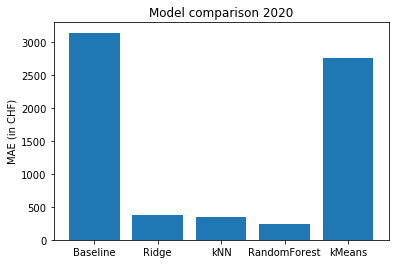

,Model,MAE,RMSE,MSE
0,Baseline,3145.044,40103.069,15.322
1,Ridge,380.454,5274.627,0.203
2,kNN,347.223,3772.601,0.241
3,RandomForest,233.630,2179.861,0.161
4,kMeans,2758.461,37468.638,1.965


In [12]:
# Compare Models
mae_values = results2020['MAE']
titles = ['Baseline', 'Ridge', 'kNN', 'RandomForest', 'kMeans']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)
plt.title('Model comparison 2020')
plt.ylabel('MAE (in CHF)')
plt.show()

results2020

The best model for the dataset ending 2020 (based on the mean absolute error MAE) seems to be the RandomForest regression, followed by the kNN and Ridge regressions. The Clustering (kMeans) model performs only slightly better than the baseline. Let's do some scatter plots of real vs predicted turnover.

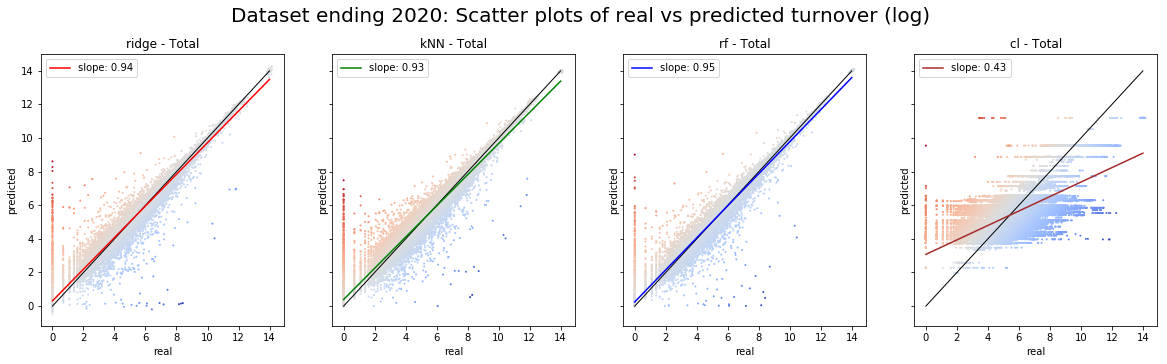

In [13]:
plot_predictions(df2020_pred,2020)

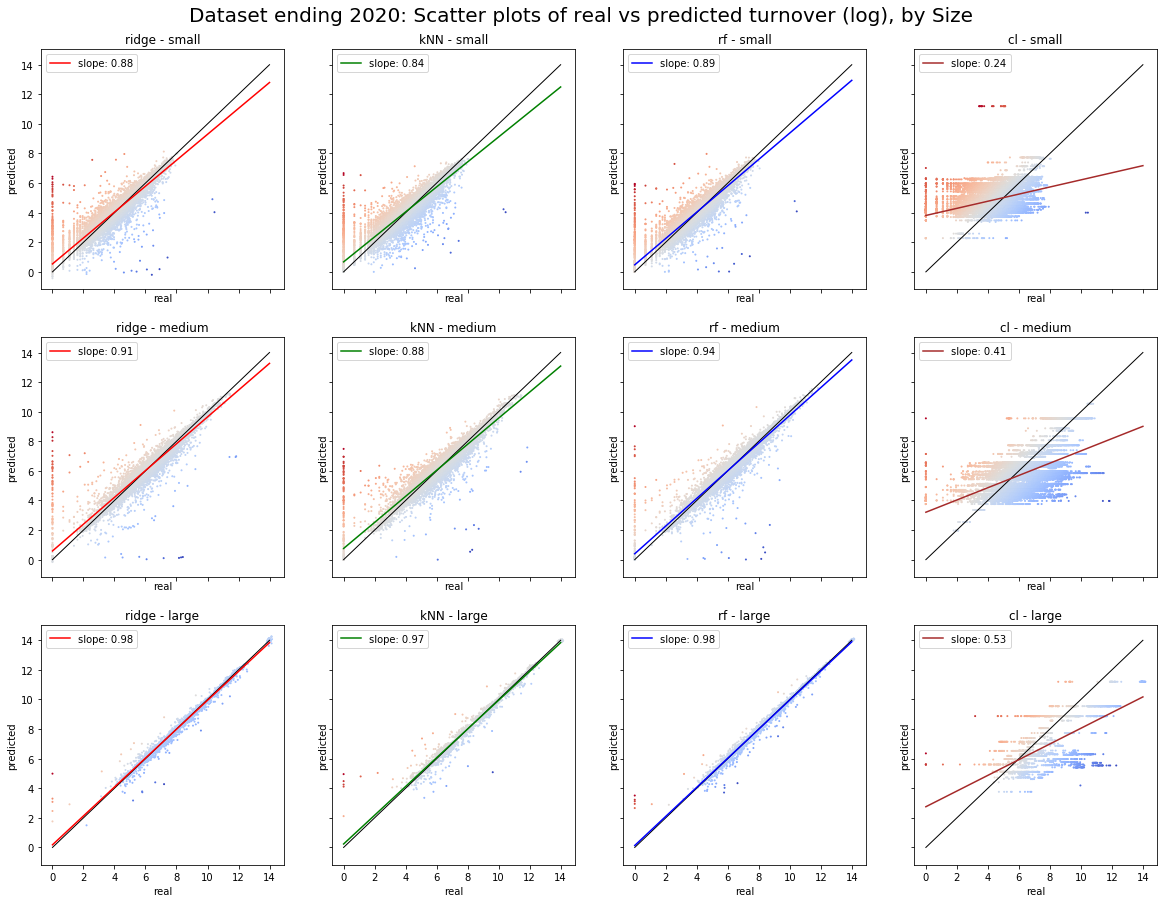

In [14]:
plot_predictions2(df2020_pred,2020,'Size')

As we have already seen, the estimations are better for bigger enterprises. This is true for all models. The RandomForest model performs best for all sizes. Now let's see if there are differences between the economic branches (Noga).

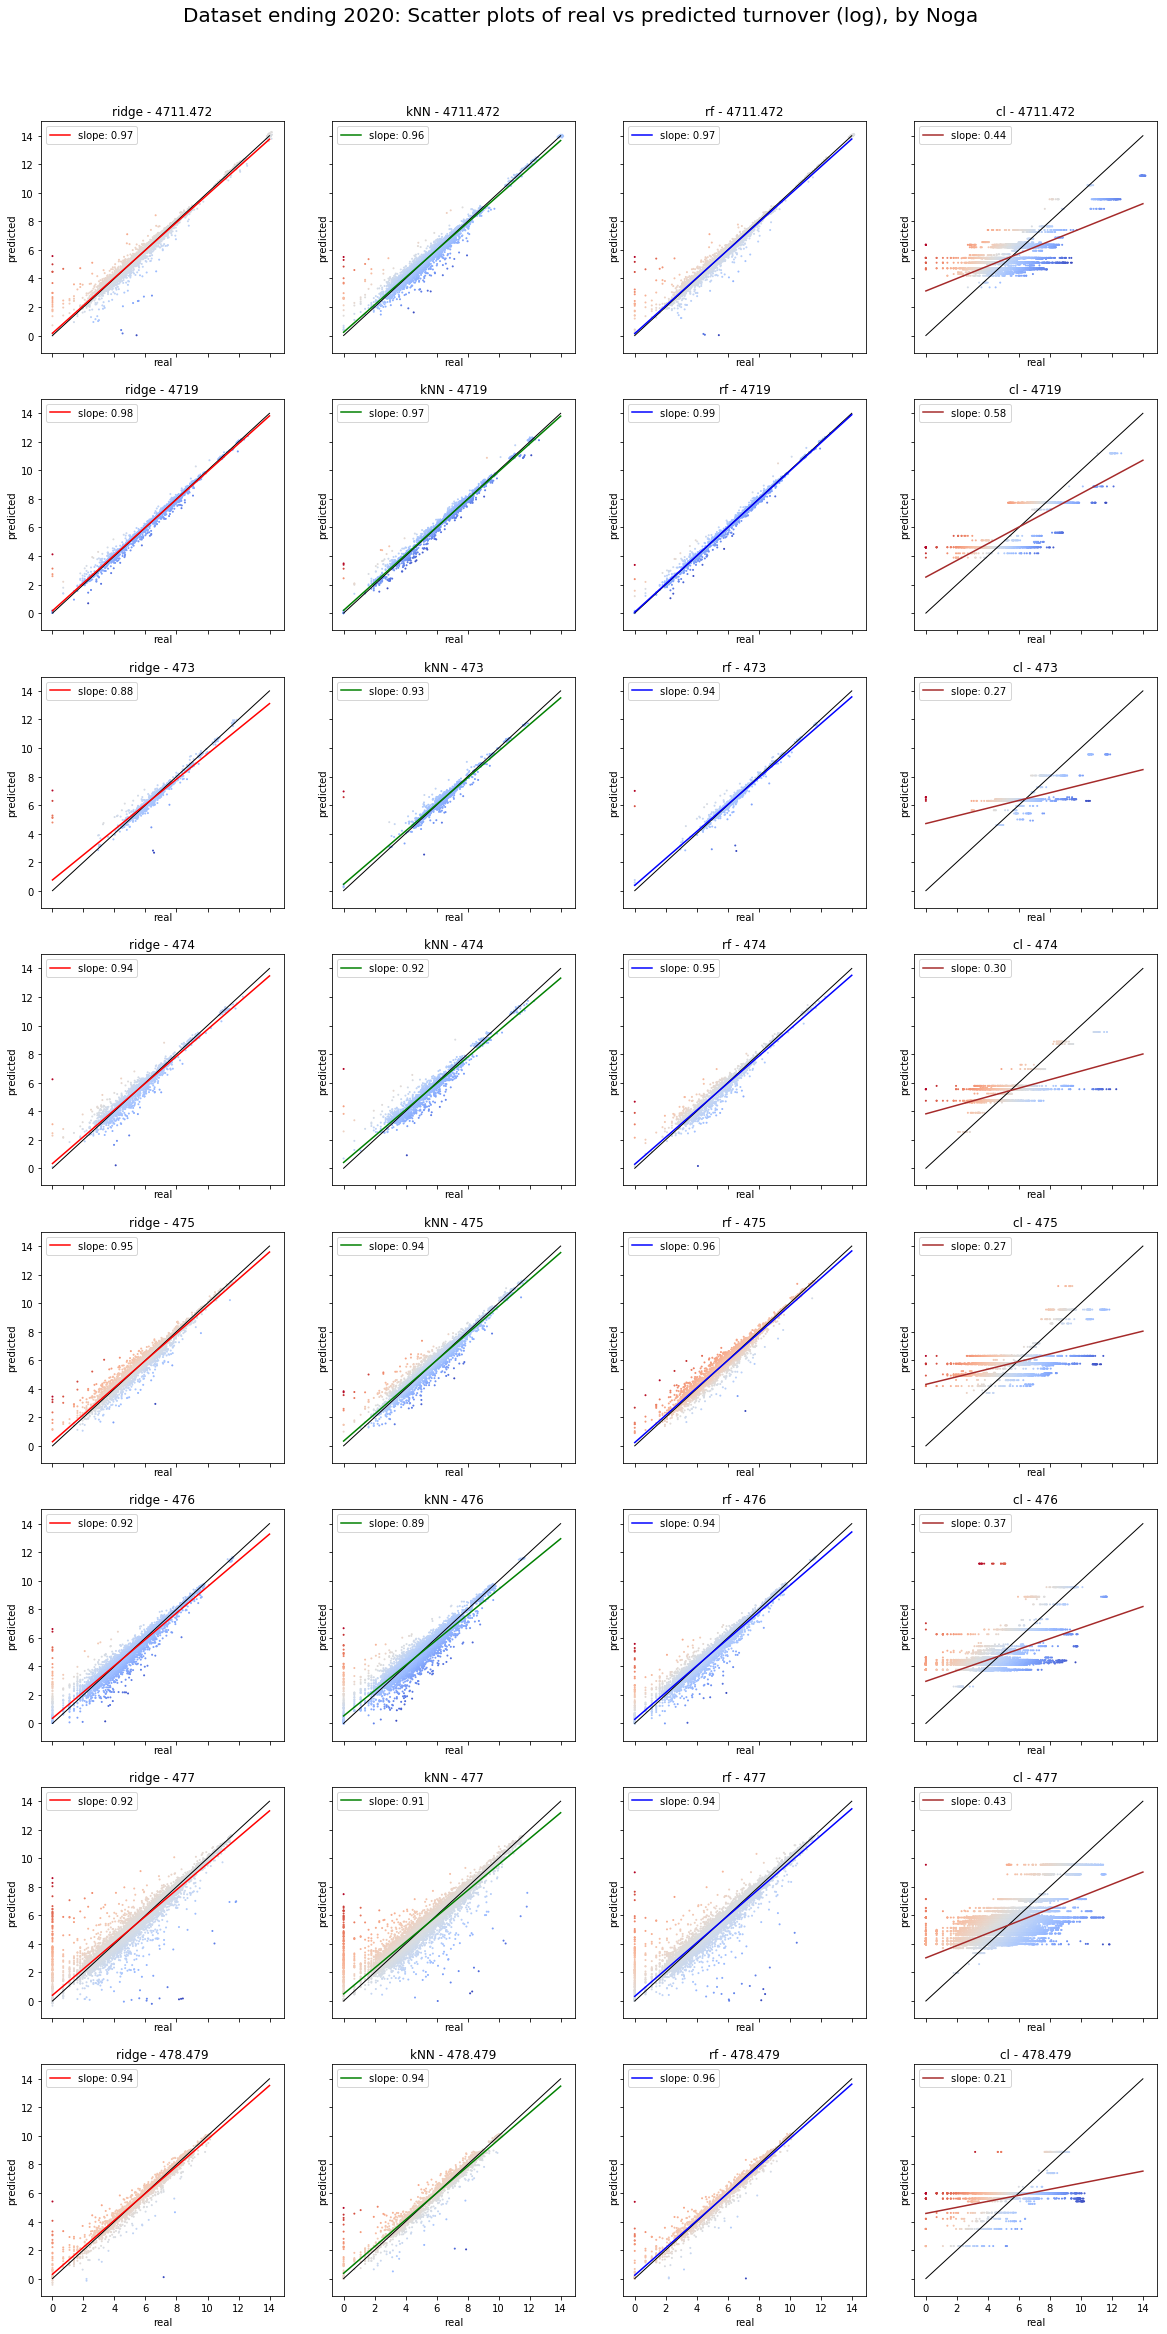

In [15]:
plot_predictions2(df2020_pred,2020,'Noga')

The quality is similar between the branches. The higher quality for Noga 4719 and the lower quality for Noga 476 can be explained by the fact that in Noga 4719 there are mainly big enterprises, whereas Noga 476 has more small enterprises.

Now, let's calculate the mean absolute error in comparison to the mean turnover per stratum to get a relative comparison which is not influenced by the size of an enterprise.

In [16]:
calc_metric_group(df2020_pred,2020,'Stratum_Size','MAE')

,TOV,MAE_ridge,MAE_kNN,MAE_rf,MAE_kMeans,MAE_pct_ridge,MAE_pct_kNN,MAE_pct_rf,MAE_pct_kMeans
Stratum_Size,,,,,,,,,
1.0,157.2,30.0,33.8,27.1,192.7,19.1,21.5,17.3,122.6
2.0,1515.3,253.2,304.7,215.4,1130.2,16.7,20.1,14.2,74.6
3.0,41268.1,4369.3,3388.2,2163.9,37112.5,10.6,8.2,5.2,89.9


We can see that the relative MAE (MAE_pct) decreases by size. The RandomForest model has a relative error of only about 5% for big enterprises, which is a very good estimation.

In [17]:
calc_metric_group(df2020_pred,2020,'Stratum_Noga','MAE')

,TOV,MAE_ridge,MAE_kNN,MAE_rf,MAE_kMeans,MAE_pct_ridge,MAE_pct_kNN,MAE_pct_rf,MAE_pct_kMeans
Stratum_Noga,,,,,,,,,
4711.472,13370.8,1408.5,859.6,551.9,12201.0,10.5,6.4,4.1,91.3
4719,5276.5,482.6,913.6,407.1,3658.3,9.1,17.3,7.7,69.3
473,2310.0,279.2,197.1,166.1,1681.4,12.1,8.5,7.2,72.8
474,2711.0,443.4,480.8,365.6,2290.4,16.4,17.7,13.5,84.5
475,2711.0,342.0,381.0,296.5,2437.5,12.6,14.1,10.9,89.9
476,749.2,96.8,121.7,74.8,801.8,12.9,16.2,10.0,107.0
477,1192.0,198.1,227.9,165.4,967.0,16.6,19.1,13.9,81.1
478.479,1874.7,287.9,314.7,248.3,1630.8,15.4,16.8,13.2,87.0


Again, there are some differences between the branches, but for the RandomForest model, the relative error is always below 14%.

The following plots show the distribution of the errors in histograms.

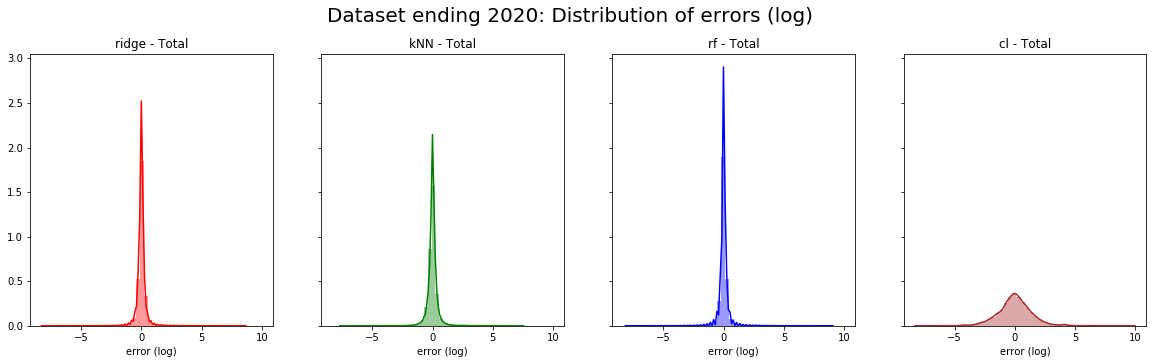

In [18]:
plot_errdist(df2020_pred,2020)

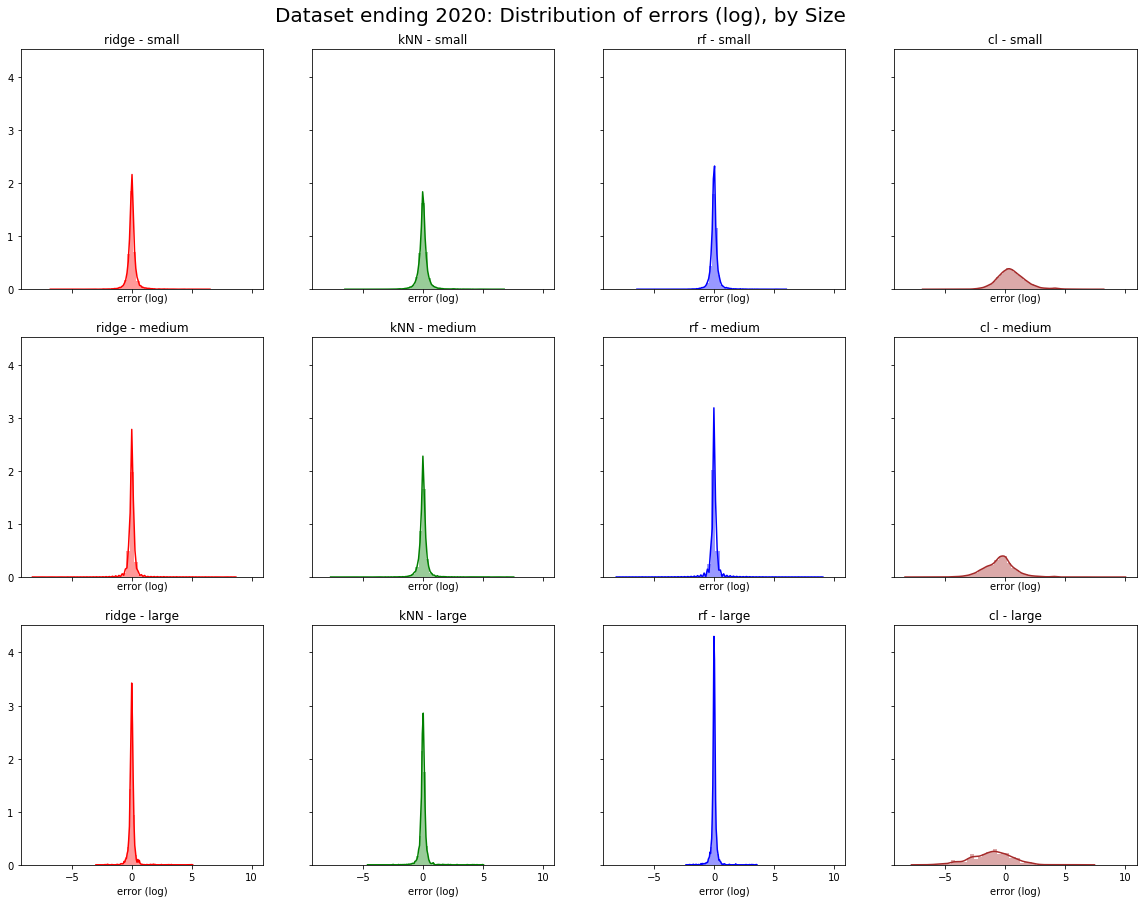

In [19]:
plot_errdist2(df2020_pred,2020,'Size')

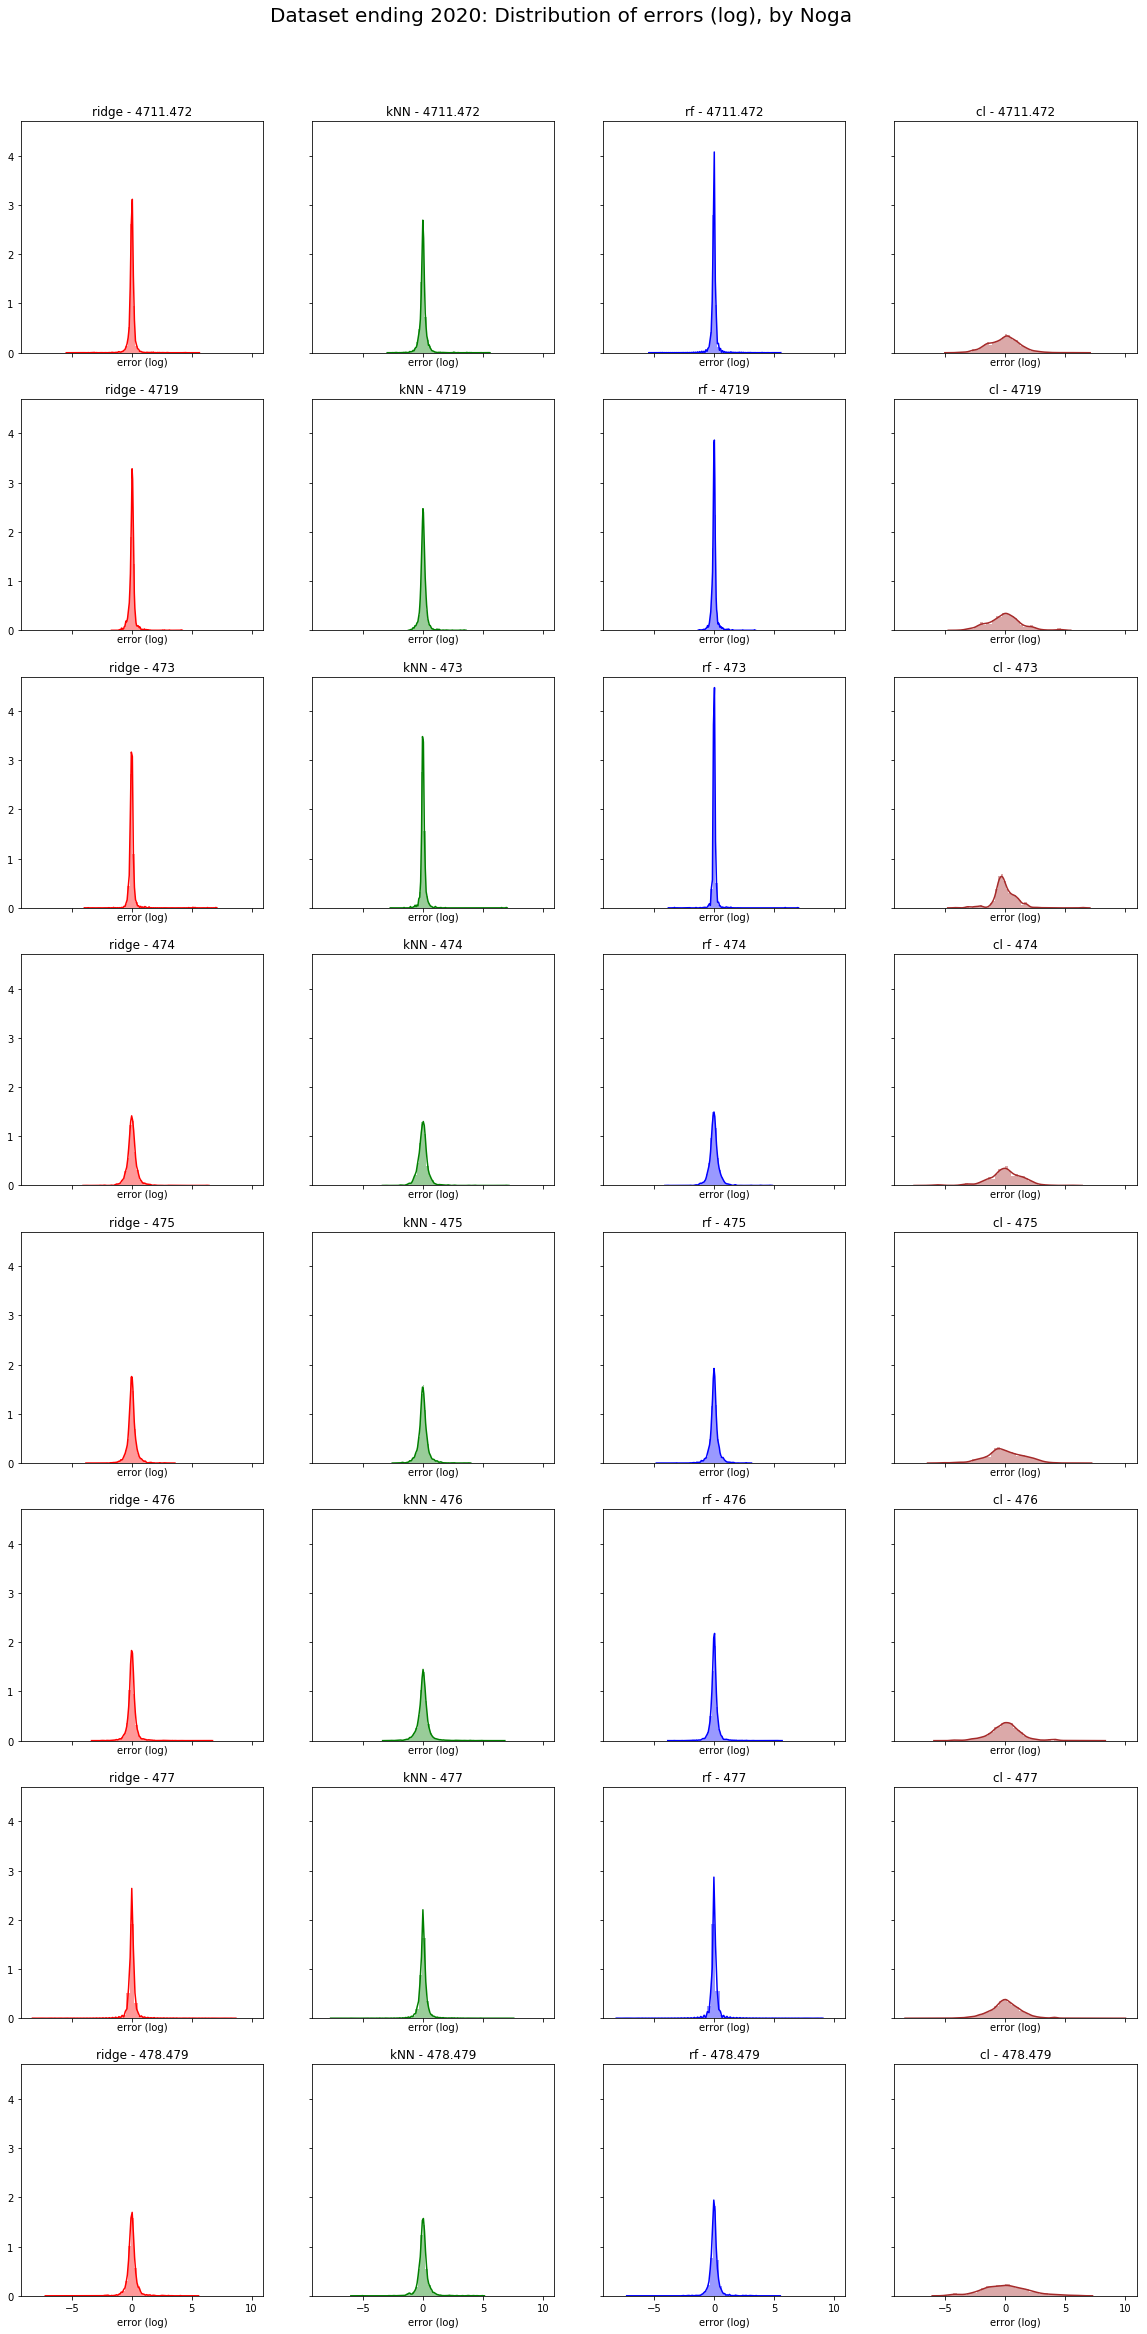

In [20]:
plot_errdist2(df2020_pred,2020,'Noga')

Exept for the kMeans model, the errors seem to be narrowly centered around 0, indicating low bias. Let's verify this.

In [21]:
calc_metric(df2020_pred,2020,'ME')

,TOV,err_ridge,err_kNN,err_rf,err_cl,ME_pct_ridge,ME_pct_kNN,ME_pct_rf,ME_pct_kMeans
0,3150.4,-57.7,-82.4,-38.3,-2291.1,-1.8,-2.6,-1.2,-72.7


In [22]:
calc_metric_group(df2020_pred,2020,'Stratum_Size','ME')

,TOV,ME_ridge,ME_kNN,ME_rf,ME_kMeans,ME_pct_ridge,ME_pct_kNN,ME_pct_rf,ME_pct_kMeans
Stratum_Size,,,,,,,,,
1.0,157.2,-9.3,-11.5,-8.6,83.1,-5.9,-7.3,-5.5,52.9
2.0,1515.3,-97.6,-96.6,-48.5,-603.1,-6.4,-6.4,-3.2,-39.8
3.0,41268.1,-187.3,-594.6,-222.0,-35481.7,-0.5,-1.4,-0.5,-86.0


In [23]:
calc_metric_group(df2020_pred,2020,'Stratum_Noga','ME')

,TOV,ME_ridge,ME_kNN,ME_rf,ME_kMeans,ME_pct_ridge,ME_pct_kNN,ME_pct_rf,ME_pct_kMeans
Stratum_Noga,,,,,,,,,
4711.472,13370.8,153.1,-159.8,-34.3,-11990.6,1.1,-1.2,-0.3,-89.7
4719,5276.5,-115.8,-28.0,71.0,-3195.5,-2.2,-0.5,1.3,-60.6
473,2310.0,15.7,-46.2,-46.7,-1415.0,0.7,-2.0,-2.0,-61.3
474,2711.0,-246.1,-265.4,-190.0,-2123.2,-9.1,-9.8,-7.0,-78.3
475,2711.0,-175.5,-78.4,-77.6,-1641.9,-6.5,-2.9,-2.9,-60.6
476,749.2,-41.3,-25.8,-16.2,-153.2,-5.5,-3.4,-2.2,-20.5
477,1192.0,-84.5,-77.2,-36.6,-510.2,-7.1,-6.5,-3.1,-42.8
478.479,1874.7,-106.8,-68.8,-48.6,-1238.4,-5.7,-3.7,-2.6,-66.1


The above tables show that the mean errors are close to 0, but mainly negative. This means, that the models generally underestimate turnover, but the bias is small, and is getting smaller with increasing size of the enterprise. The relative mean error (ME_pct) is smaller than -3% for all models exept kMeans. For big enterprises it is smaller than -1.5%. For the branches, the bias is bigger, but with less than 10% still quite small.

### 2.2 Dataset ending 2019 <a name="2.2"></a>

For the dataset ending 2019, let's also calculate the differences between predicted and real turnover per entry and model.

In [24]:
# Calculate differences between predicted and real turnover
df2019_pred['err_ridge'] = df2019_pred['TOV_ridge'] - df2019_pred['TOV']
df2019_pred['err_ridge_log'] = np.log1p(df2019_pred['TOV_ridge']) - np.log1p(df2019_pred['TOV'])
df2019_pred['err_kNN'] = df2019_pred['TOV_kNN'] - df2019_pred['TOV']
df2019_pred['err_kNN_log'] = np.log1p(df2019_pred['TOV_kNN']) - np.log1p(df2019_pred['TOV'])
df2019_pred['err_rf'] = df2019_pred['TOV_rf'] - df2019_pred['TOV']
df2019_pred['err_rf_log'] = np.log1p(df2019_pred['TOV_rf']) - np.log1p(df2019_pred['TOV'])
df2019_pred['err_cl'] = df2019_pred['TOV_cl'] - df2019_pred['TOV']
df2019_pred['err_cl_log'] = np.log1p(df2019_pred['TOV_cl']) - np.log1p(df2019_pred['TOV'])
df2019_pred.head()

,,TOV,Year,Month,KT,Lang,Stratum_Noga,Sample_ID,Noga_Enterprise,Hist_Limit,Channel_ID,...,TOV_rf,TOV_cl,err_ridge,err_ridge_log,err_kNN,err_kNN_log,err_rf,err_rf_log,err_cl,err_cl_log
OID,Date,,,,,,,,,,,,,,,,,,,,,
3145896,2015-08,908,2015,8,GE,2,473,Q2,4730,201401,2.0,...,998.7,622.9,44.1,0.0,77.3,0.1,90.7,0.1,-285.1,-0.4
2705074,2019-11,32,2019,11,TI,3,475,Q1,4759,201801,5.0,...,30.0,61.2,-0.7,-0.0,7.3,0.2,-2.0,-0.1,29.2,0.6
6980772,2015-02,69,2015,2,BE,1,477,M,4778,201401,2.0,...,52.1,44.8,-17.5,-0.3,5.6,0.1,-16.9,-0.3,-24.2,-0.4
5107348,2017-12,116,2017,12,AG,1,477,Q1,4775,201401,1.0,...,111.6,117.6,-4.1,-0.0,-22.5,-0.2,-4.4,-0.0,1.6,0.0
1298468,2018-11,28,2018,11,VS,2,476,Q3,4764,201401,2.0,...,77.8,59.3,21.5,0.6,12.6,0.4,49.8,1.0,31.3,0.7


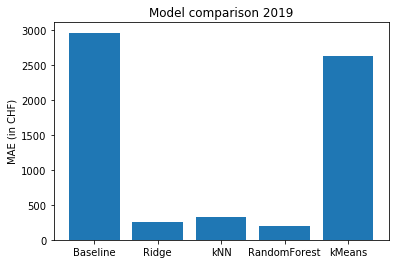

,Model,MAE,RMSE,MSE
0,Baseline,2956.6,38434.6,15.1
1,Ridge,256.2,2993.8,0.1
2,kNN,330.0,4211.8,0.2
3,RandomForest,195.9,1974.3,0.1
4,kMeans,2628.1,36623.1,1.9


In [25]:
# Compare Models
mae_values = results2019['MAE']
titles = ['Baseline', 'Ridge', 'kNN', 'RandomForest', 'kMeans']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)
plt.title('Model comparison 2019')
plt.ylabel('MAE (in CHF)')
plt.show()

results2019

The best model for the dataset ending 2019 (based on the mean absolute error MAE) seems also to be the RandomForest regression, followed by the Ridge and kNN regressions. The Clustering (kMeans) model performs only slightly better than the baseline. Let's do some scatter plots of real vs predicted turnover.

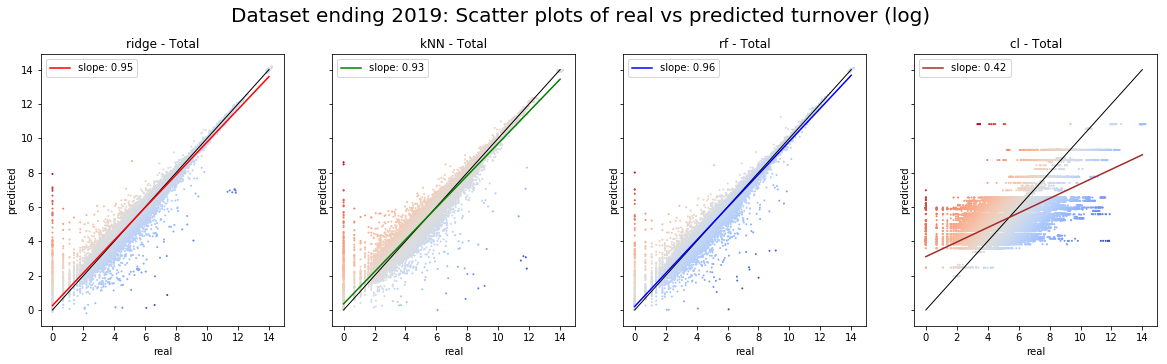

In [26]:
plot_predictions(df2019_pred,2019)

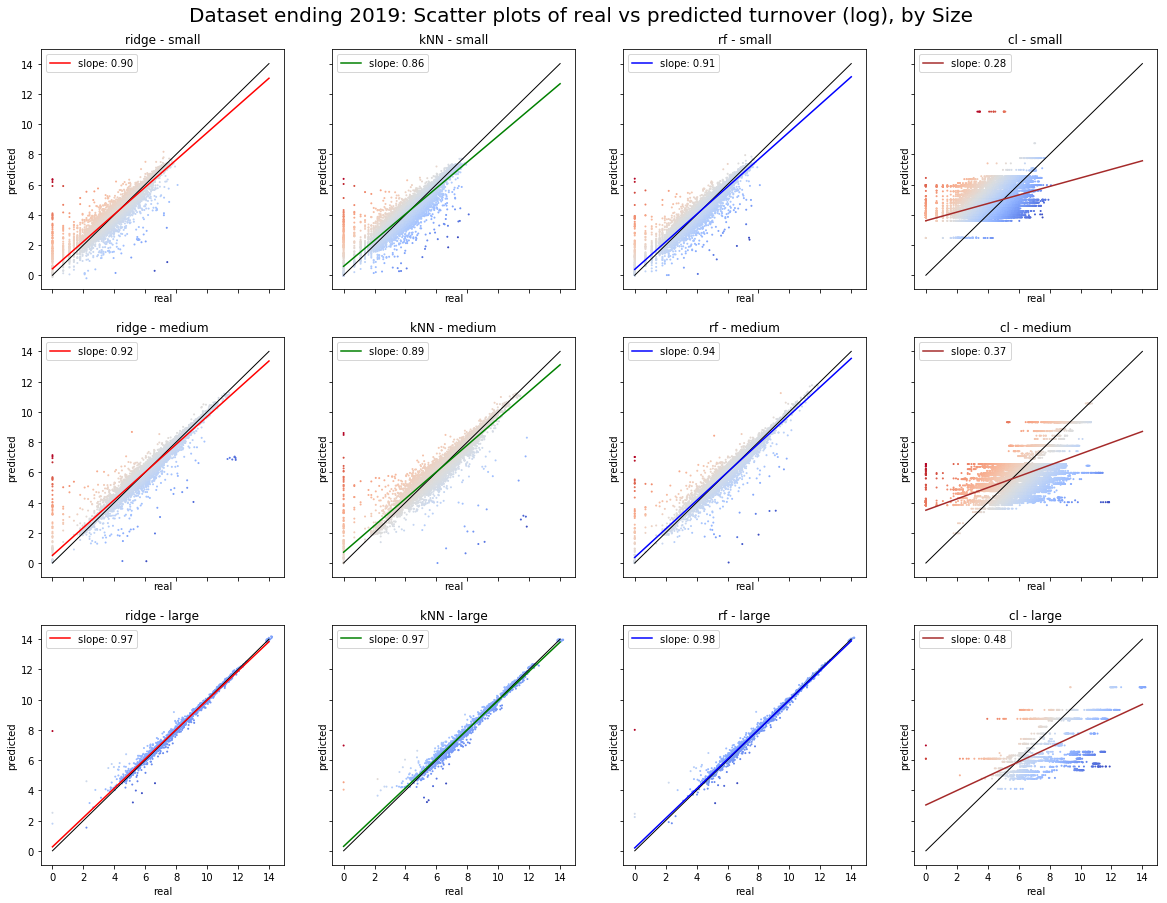

In [27]:
plot_predictions2(df2019_pred,2019,'Size')

As we have already seen, the estimations are better for bigger enterprises. This is true for all models. The RandomForest model performs best for all sizes. Now let's see if there are differences between the economic branches (Noga).

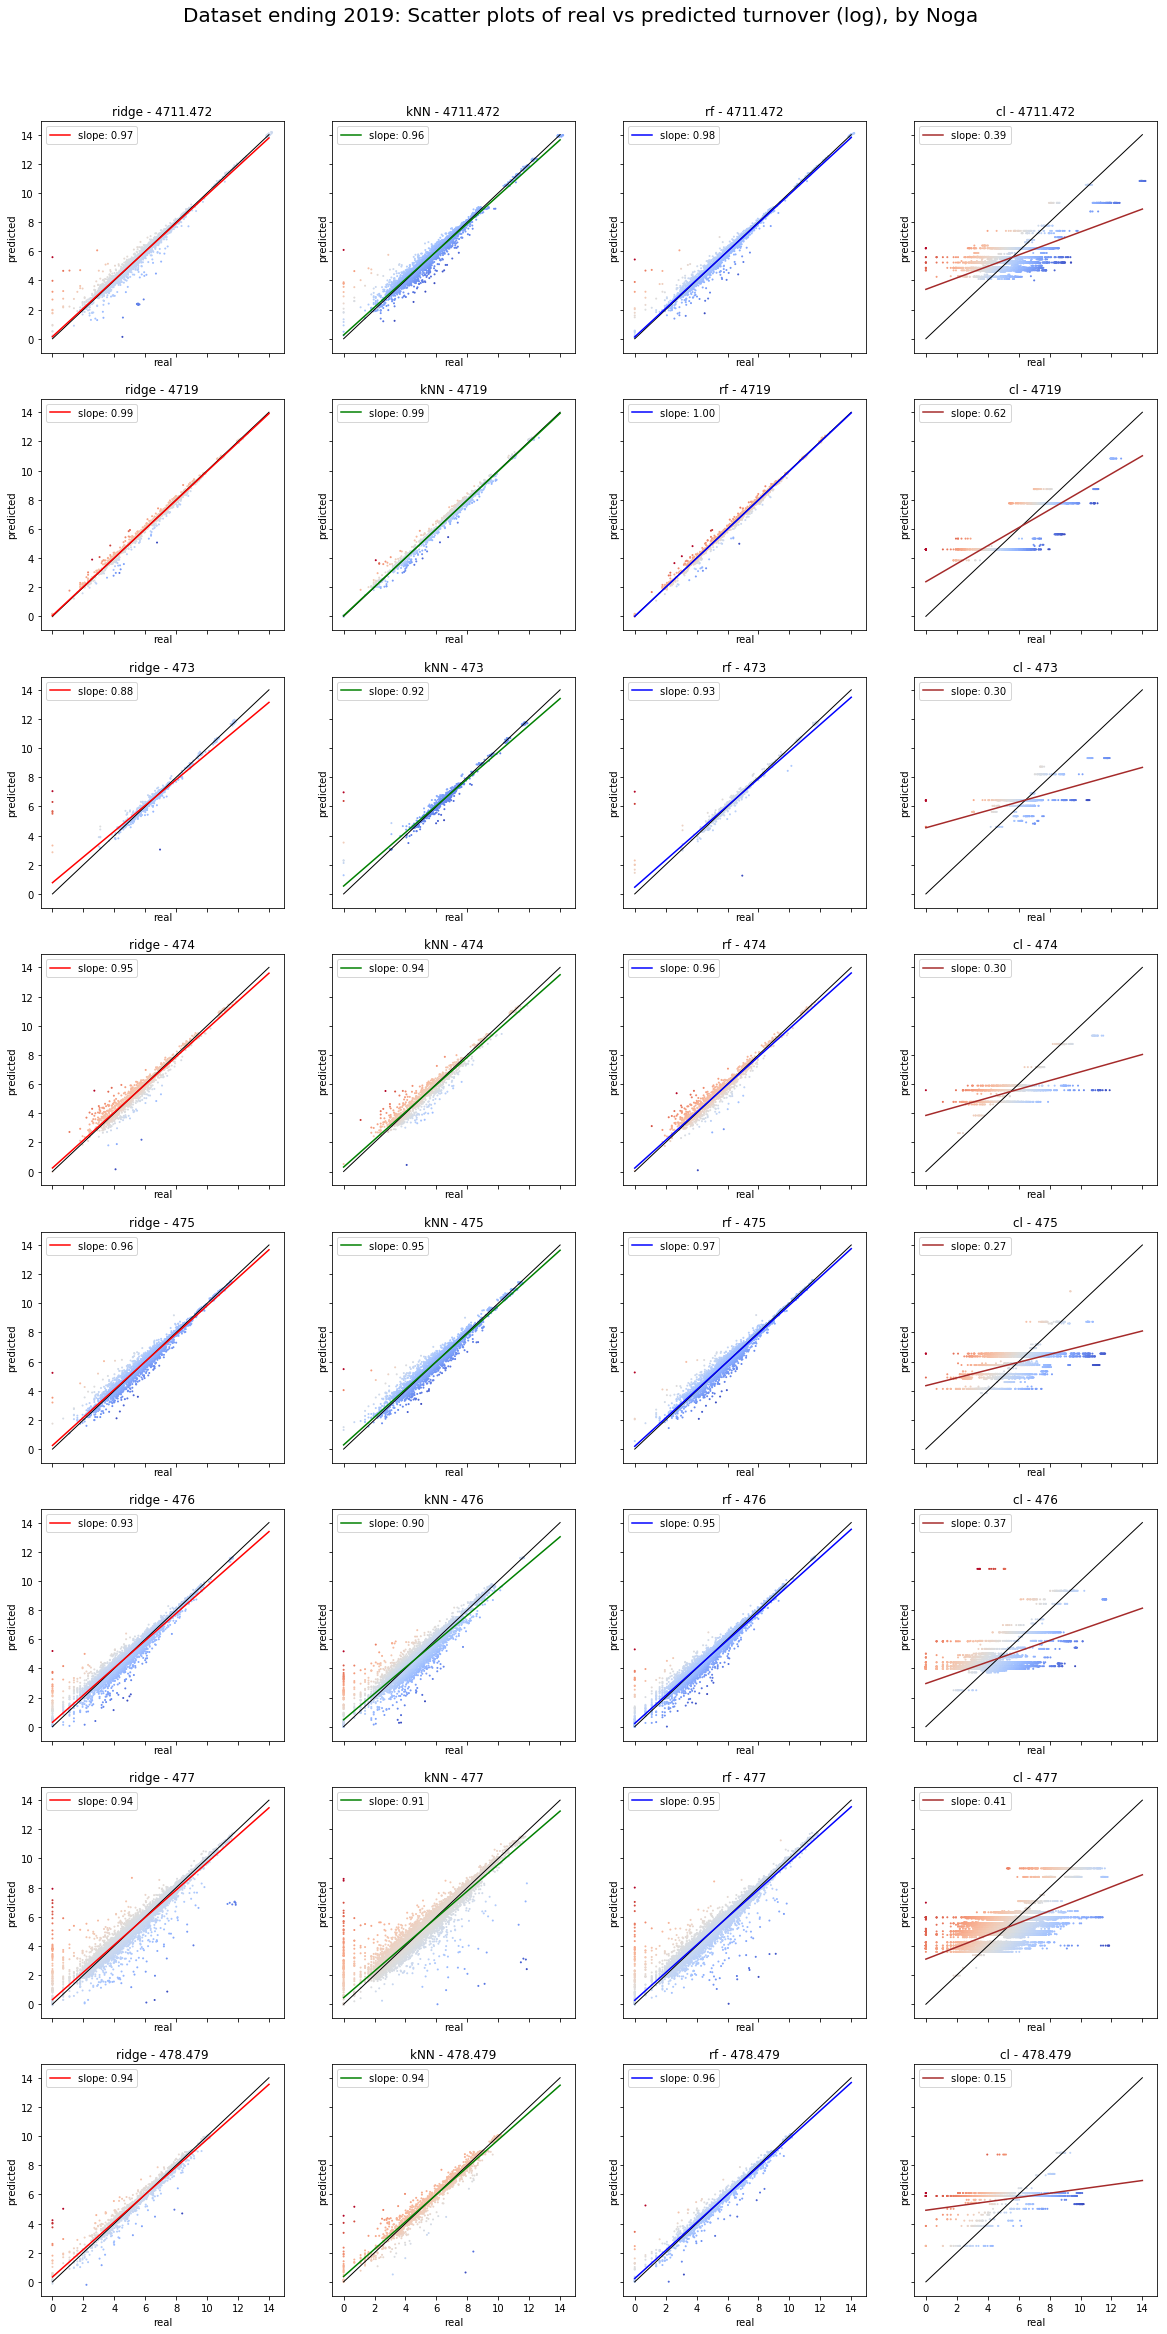

In [28]:
plot_predictions2(df2019_pred,2019,'Noga')

The quality is similar between the branches. The higher quality for Noga 4719 and the lower quality for Noga 476 can be explained by the fact that in Noga 4719 there are mainly big enterprises, whereas Noga 476 has more small enterprises.

Now, let's calculate the mean absolute error in comparison to the mean turnover (MAE_pct) per stratum to get a relative comparison which is not influenced by the size of an enterprise.

In [29]:
calc_metric_group(df2019_pred,2019,'Stratum_Size','MAE')

,TOV,MAE_ridge,MAE_kNN,MAE_rf,MAE_kMeans,MAE_pct_ridge,MAE_pct_kNN,MAE_pct_rf,MAE_pct_kMeans
Stratum_Size,,,,,,,,,
1.0,151.3,24.1,29.8,22.5,164.9,15.9,19.7,14.9,109.0
2.0,1421.6,230.6,292.2,179.1,1047.8,16.2,20.6,12.6,73.7
3.0,38412.2,2412.5,3156.8,1789.2,35450.9,6.3,8.2,4.7,92.3


We can see that the relative MAE (MAE_pct) decreases by size. The RandomForest model has a relative error of only about 5% for big enterprises, which is a very good estimation.

In [30]:
calc_metric_group(df2019_pred,2019,'Stratum_Noga','MAE')

,TOV,MAE_ridge,MAE_kNN,MAE_rf,MAE_kMeans,MAE_pct_ridge,MAE_pct_kNN,MAE_pct_rf,MAE_pct_kMeans
Stratum_Noga,,,,,,,,,
4711.472,12226.7,696.5,876.5,494.6,11345.7,5.7,7.2,4.0,92.8
4719,5350.5,370.3,654.4,359.0,4037.7,6.9,12.2,6.7,75.5
473,2975.8,253.7,222.6,213.7,2361.8,8.5,7.5,7.2,79.4
474,2728.0,369.0,423.8,292.7,2298.7,13.5,15.5,10.7,84.3
475,2708.6,256.4,365.8,221.2,2473.7,9.5,13.5,8.2,91.3
476,781.5,84.3,119.8,61.1,744.9,10.8,15.3,7.8,95.3
477,1161.6,182.1,230.0,134.3,956.5,15.7,19.8,11.6,82.3
478.479,1839.4,240.1,282.9,213.4,1673.5,13.1,15.4,11.6,91.0


Again, there are some differences between the branches, but for the RandomForest model, the relative error is always below 12%.

The following plots show the distribution of the errors in histograms.

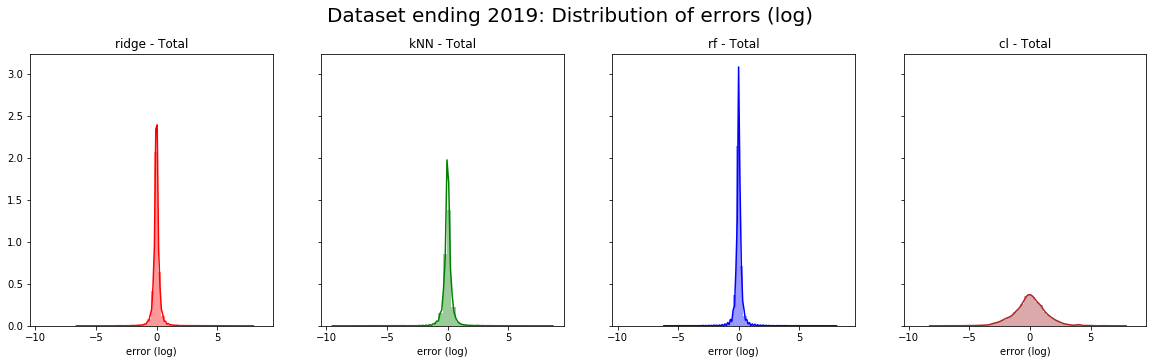

In [31]:
plot_errdist(df2019_pred,2019)

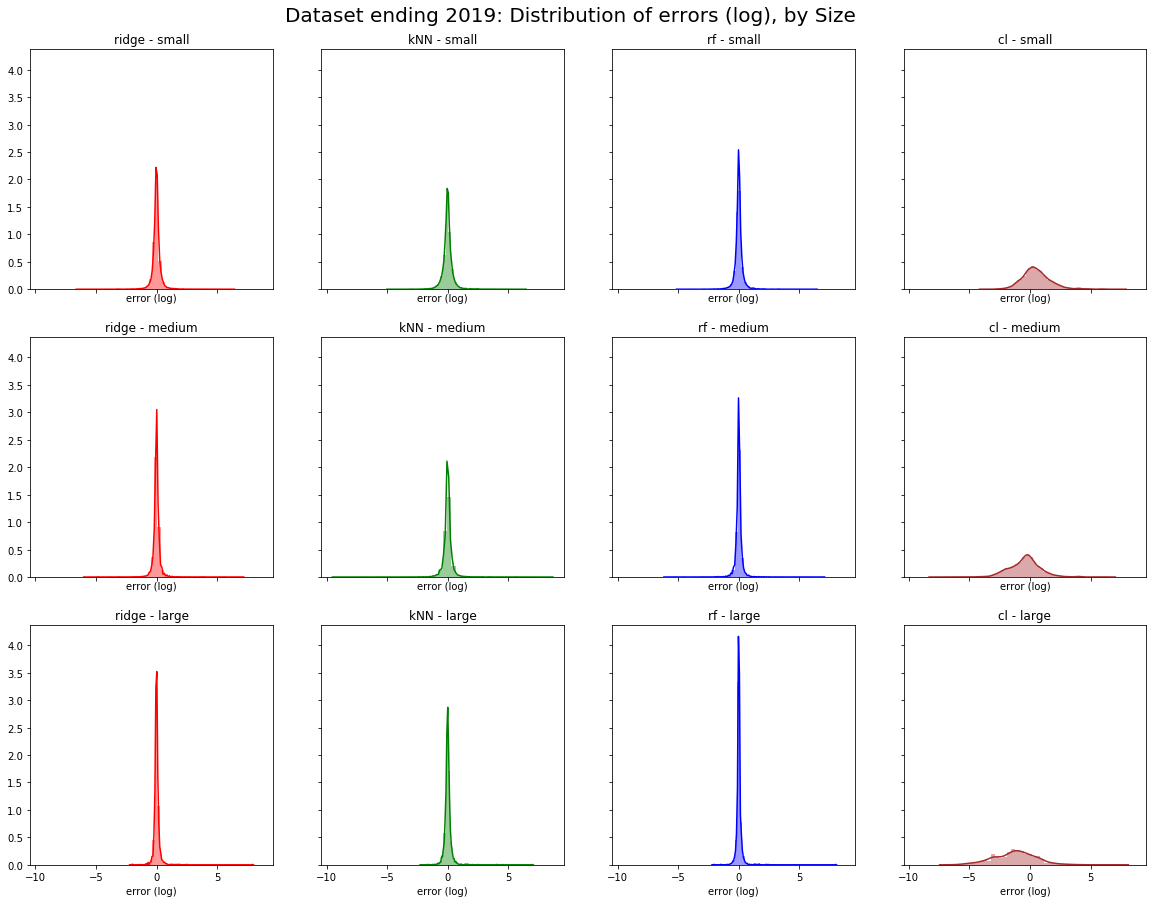

In [32]:
plot_errdist2(df2019_pred,2019,'Size')

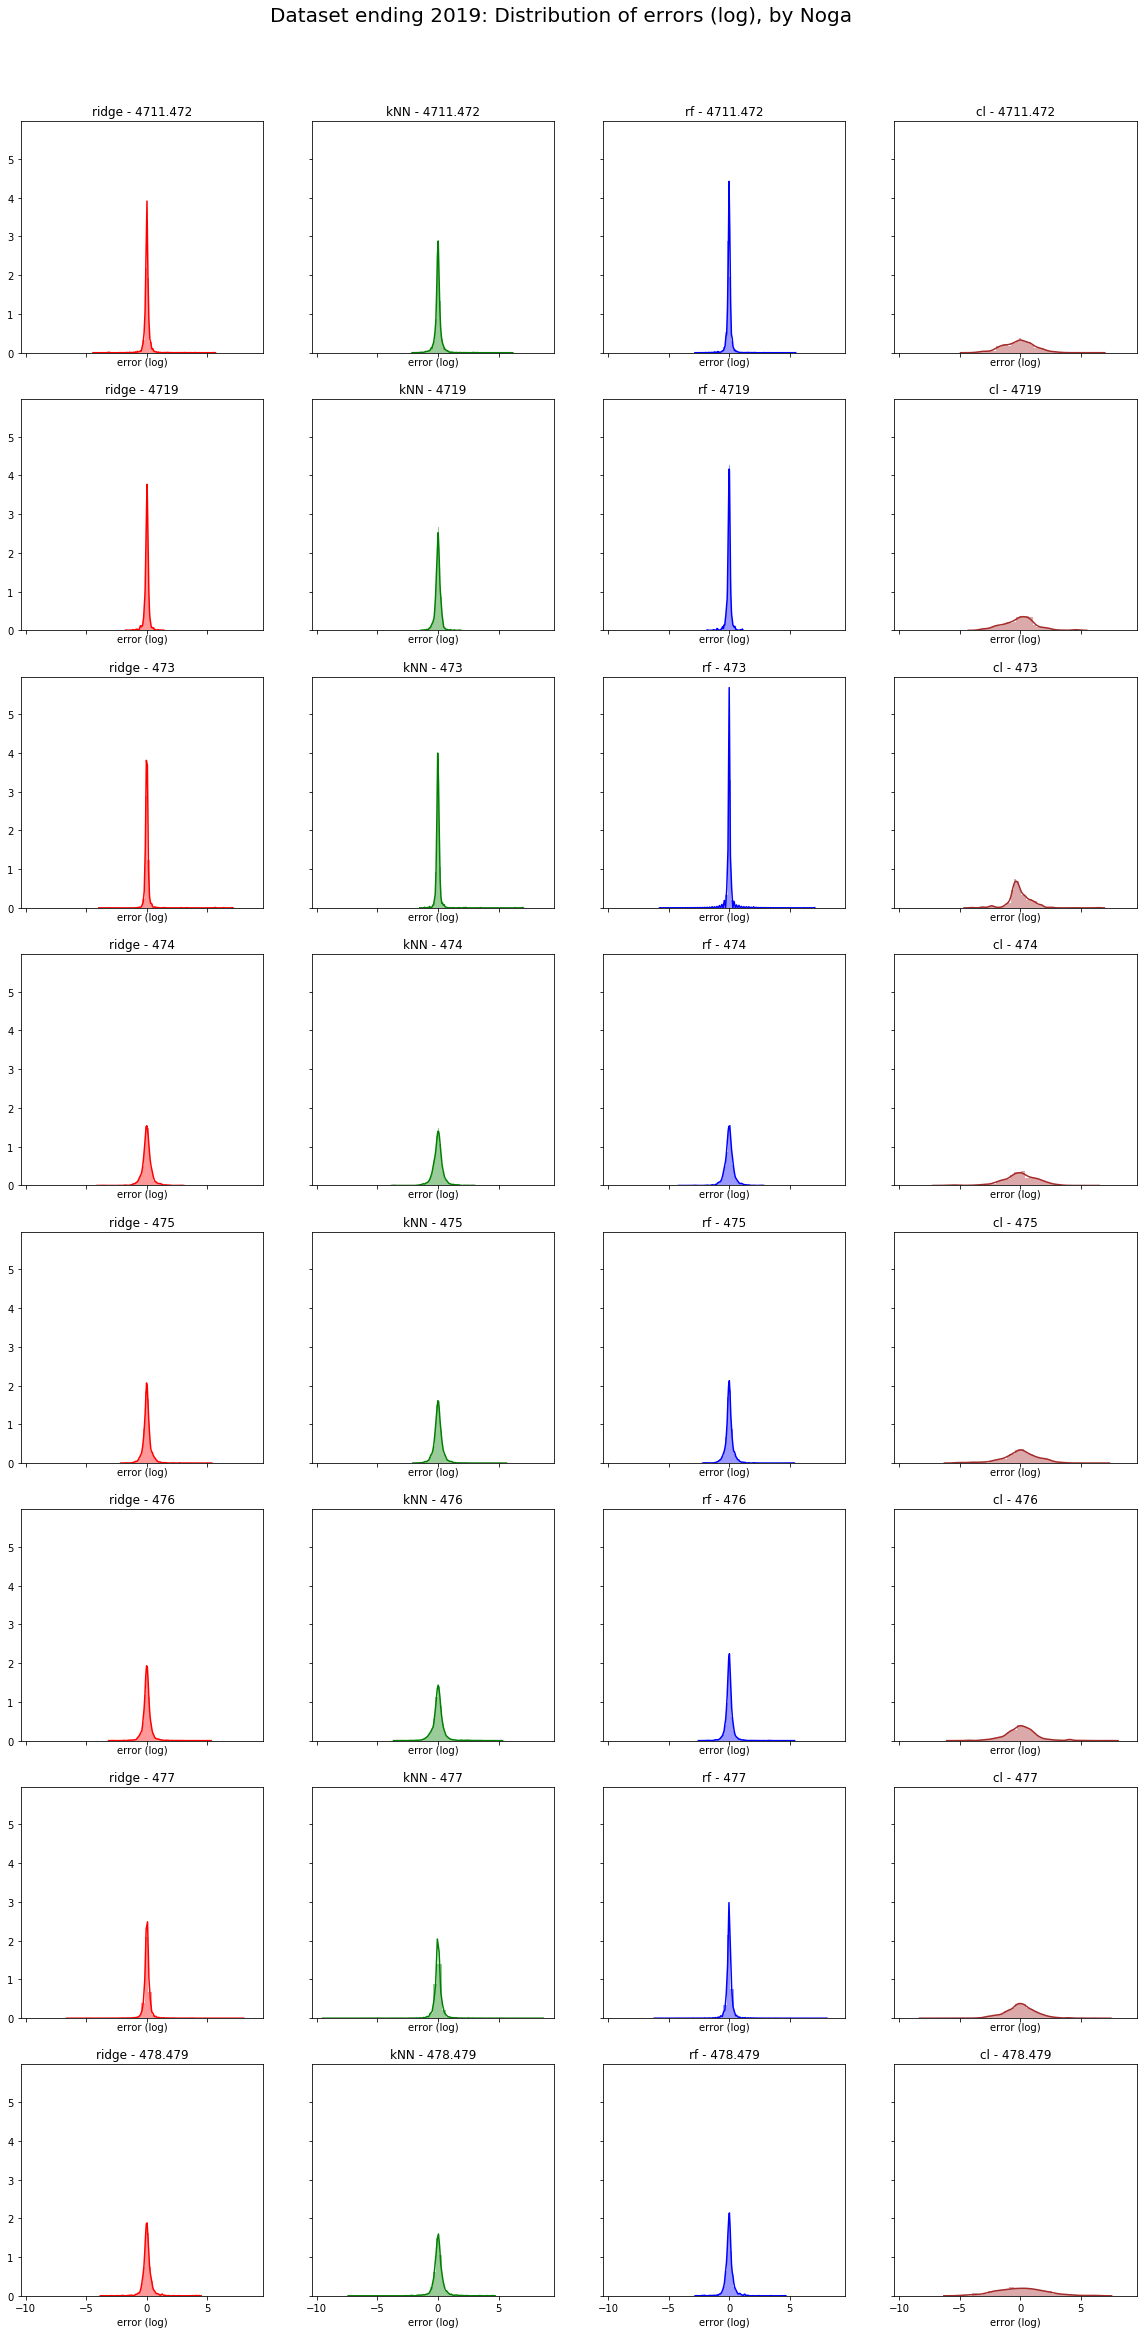

In [33]:
plot_errdist2(df2019_pred,2019,'Noga')

Exept for the kMeans model, the errors seem to be narrowly centered around 0, indicating low bias. Let's verify this.

In [34]:
calc_metric(df2019_pred,2019,'ME')

,TOV,err_ridge,err_kNN,err_rf,err_cl,ME_pct_ridge,ME_pct_kNN,ME_pct_rf,ME_pct_kMeans
0,2962.0,-63.7,-107.0,-33.6,-2255.4,-2.2,-3.6,-1.1,-76.1


In [35]:
calc_metric_group(df2019_pred,2019,'Stratum_Size','ME')

,TOV,ME_ridge,ME_kNN,ME_rf,ME_kMeans,ME_pct_ridge,ME_pct_kNN,ME_pct_rf,ME_pct_kMeans
Stratum_Size,,,,,,,,,
1.0,151.3,-5.8,-7.9,-5.3,69.2,-3.8,-5.2,-3.5,45.8
2.0,1421.6,-99.4,-104.4,-26.3,-610.2,-7.0,-7.3,-1.9,-42.9
3.0,38412.2,-286.3,-963.9,-328.1,-34426.3,-0.7,-2.5,-0.9,-89.6


In [36]:
calc_metric_group(df2019_pred,2019,'Stratum_Noga','ME')

,TOV,ME_ridge,ME_kNN,ME_rf,ME_kMeans,ME_pct_ridge,ME_pct_kNN,ME_pct_rf,ME_pct_kMeans
Stratum_Noga,,,,,,,,,
4711.472,12226.7,-10.5,-309.7,-140.4,-11128.0,-0.1,-2.5,-1.1,-91.0
4719,5350.5,-112.6,-49.7,10.5,-3332.2,-2.1,-0.9,0.2,-62.3
473,2975.8,43.9,-47.7,-9.1,-2055.0,1.5,-1.6,-0.3,-69.1
474,2728.0,-112.5,-177.3,-69.2,-2142.1,-4.1,-6.5,-2.5,-78.5
475,2708.6,-101.1,-76.3,-24.3,-2082.9,-3.7,-2.8,-0.9,-76.9
476,781.5,-34.5,-21.9,-8.9,-342.7,-4.4,-2.8,-1.1,-43.9
477,1161.6,-83.0,-97.8,-16.1,-558.5,-7.1,-8.4,-1.4,-48.1
478.479,1839.4,-91.3,-66.7,-59.1,-1387.4,-5.0,-3.6,-3.2,-75.4


The above tables show that the mean errors are close to 0, but mainly negative. This means, that the models generally underestimate turnover, but the bias is small, and is getting smaller with increasing size of the enterprise. The relative mean error (ME_pct) is smaller than -4% for all models exept kMeans. For big enterprises it is smaller than -2.5%. For the branches, the bias is bigger, but with less than 9% still quite small.

## 3. Final Comments <a name="3"></a>

In [37]:
final_results=pd.merge(results2020, results2019, on='Model', suffixes=[' 2020', ' 2019'])
final_results[['Model','MAE 2020','MAE 2019']]

,Model,MAE 2020,MAE 2019
0,Baseline,3145.0,2956.6
1,Ridge,380.5,256.2
2,kNN,347.2,330.0
3,RandomForest,233.6,195.9
4,kMeans,2758.5,2628.1


The three supervised learning models (Ridge, kNN, RandomForest) produce good and similar results, with the RandomForest regression being the best model. The unsupervised model (kMeans Clustering) yields a result that is only sightly better than the baseline of turnover one year before. This model doesn't use the whole information available for the task of estimating turnover, as it uses only the features to find clusters of similar enterprises and ignores the relationship between the features and the target variable.

The differences between the two datasets (pre-pandemic vs. including the year 2020) are small for all models, with the pre-pandemic dataset yielding slightly better results. This means that the effect of the pandemic on monthly turnover can be captured quite good with a flag indicating whether there was a lockdown in a specific month. If the pre-pandemic models are nevertheless slightly better, this might be due to the increased number of enterprises with zero turnover during the lockdown.

All models produce slightly biased results, with monthly turnover being underestimated. However, the bias is small if put in relation to real turnover, e.g. ~1% for the RandomForest model.

Generally, the three supervised learning models produce results that are acceptable from a statistics production perspective and could be applied to estimate missing turnover.